# Load the data

You can download CIFAR10 dataset from official site:

https://www.cs.toronto.edu/~kriz/cifar.html

or do it using Pytorch:
https://pytorch.org/vision/stable/datasets.html#cifar

or another framework.



In [417]:
# imports
from keras.datasets import cifar10
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
import random
random.seed(196)

In [418]:
# Put your code here
(X_train, y_train), (X_val, y_val) = cifar10.load_data()

assert X_train.shape == (50000, 32, 32, 3)
assert X_val.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_val.shape == (10000, 1)

classes = ['Самолет', 'Автомобиль', 'Птица', 'Кошка', 'Олень', 'Собака', 'Лягушка', 'Лошадь', 'Корабль', 'Грузовик']

In [419]:
# Train data 5000 samples
ind_train = random.sample(range(X_train.shape[0]), 5000)
ind_val = random.sample(range(X_val.shape[0]), 500)

X_train =  X_train[ind_train]
y_train =  y_train[ind_train]

# Validation data 500 samples
X_val = X_val[ind_val]
y_val = y_val[ind_val]

assert X_train.shape == (5000, 32, 32, 3)
assert X_val.shape == (500, 32, 32, 3)
assert y_train.shape == (5000, 1)
assert y_val.shape == (500, 1)

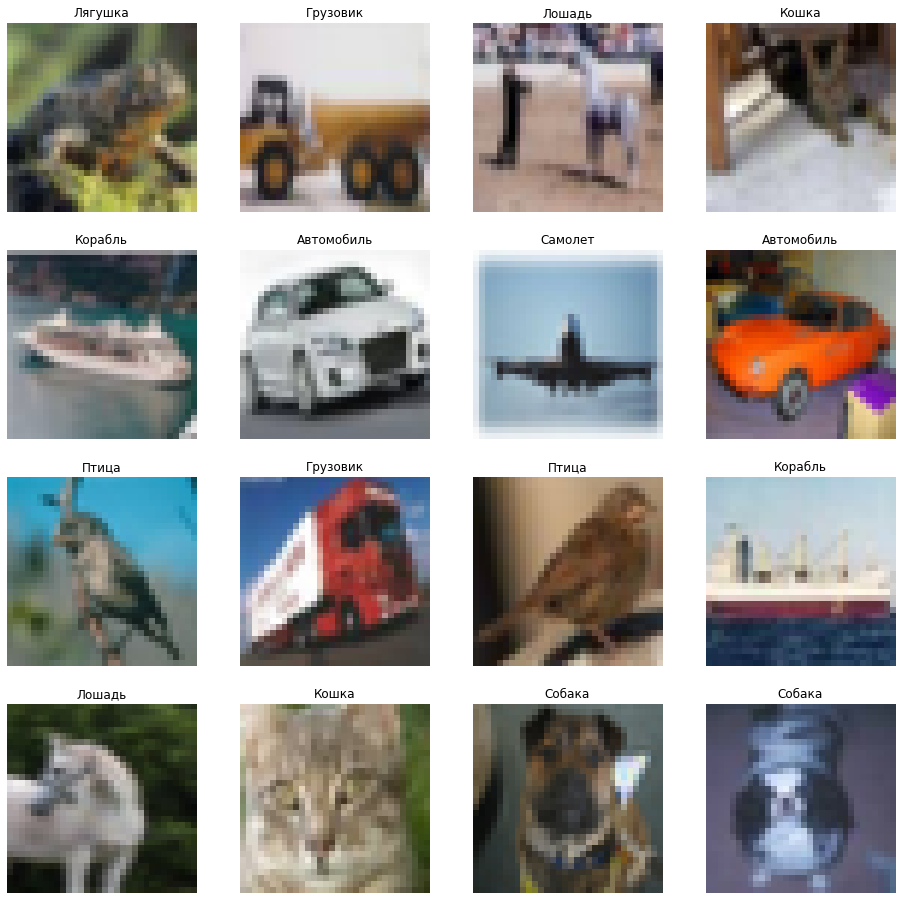

In [420]:
# Put your code here
ind_show = random.sample(range(5000), 16)
fig = plt.figure(figsize=(16, 16))
for i in range(16):
  fig.add_subplot(4, 4, i + 1)
  plt.imshow(X_train[ind_show[i]], interpolation='nearest')
  plt.title(classes[y_train[ind_show[i]][0]])
  plt.axis('off')
plt.show()

# Implement NearestNeighbor class

In [421]:
class NearestNeighbor:
  def __init__(self, dist_key): # You can change the method signature
    self.X = None
    self.y = None
    self.key = dist_key

  def fit(self,x,y): # You can change the method signature
    """
      Arguments:
        x  (Tensor or numpy.array): collection of objects from testset (batch)
        y  (Tensor or numpy.array): collection of integer 
        representing a class number for objects from x
    
    """
    self.X = x.copy()
    self.y = y.copy()

  def distance(self, pic, other_pics):
    """
      Arguments:
        pic  (Tensor): an image that is compared to the rest
        other_pics  (Tensor or numpy.array): collection of images to calculate distance to pic with
        key (String): is a distance calculation method that is applied, for now just L2 (Euclidian)
    """
    
    dist_arrays = None
    if self.key == "euclidean":
      dist_arrays = (other_pics - pic)**2
    else:
      pass
    return np.sum(np.sum(np.sum(dist_arrays, axis = 1), axis = 1), axis = 1)

  
  def predict(self,x):
    """
      Arguments:
          x  (Tensor or numpy.array): collection of objects from testset (batch)
      
      Returns:
          class_num (Tensor or numpy.array) - collection of integer representing
          class numbers for objects from x             
    """
    labels = []
    for pic in x:
      distances = self.distance(pic, self.X)
      ind_nearest = np.argmin(distances)
      labels.append(self.y[ind_nearest])

    # ... Put you code here

    return labels

##Perform smoke test

- Create model instance
- get predictions for dozen of samples


In [422]:
model_nn = NearestNeighbor("euclidean")
model_nn.fit(X_train, y_train)
predicted_labels = model_nn.predict(X_val[0:9])
for i, label in enumerate(predicted_labels):
  print(classes[label[0]],"vs",classes[y_val[i][0]])

Птица vs Лошадь
Птица vs Автомобиль
Самолет vs Кошка
Птица vs Корабль
Самолет vs Собака
Собака vs Кошка
Автомобиль vs Лошадь
Птица vs Олень
Самолет vs Автомобиль


# Validate your model

## Create validation function

Must calculate Accuracy metric for your model.

In [423]:
def validate(model,x, y):
  """
      Arguments:
          model (Object): instance of NearestNeighbor class
          x (Tensor or numpy.array): collection of objects 
          y (Tensor or numpy.array): collection of integer representing
          class numbers for objects from x   
      
      Returns:
          accuracy (float) : percentage of correctly classified objects 
    """

  result = model.predict(x)
  indeces = result == y
  correct = np.sum(indeces)
  accuracy = correct / len(x)
  
  return accuracy

 ## Calculate model accuracy on validation data

In [424]:
accuracy = validate(model_nn,X_val,y_val) 
print("Accuracy {:.3f}".format(accuracy))

Accuracy 0.194


# Place for brief conclusion
Feel free to describe troubles here.

 - Conclusion: the accuracy is rather low. With euclidian distance it's even less than 0.2
Hopefullly k-nn will be better. ALso other distance metrics and hyperparameters might help.

- Troubles: the datatypes aren't trivial, for pictures (arrays of ... arrays ... of rgbs), as well as for arrays (my y column needs calling [0] for some reson to fit it into default code)

- All in all, good fun

# Ideas for extra work

- Implenment K-NearestNeighbor
- Test different distance functions
- Find hyperparams using Cross-Validation
- Plot accuracy curve against K
- Evaluate time  

In [425]:
class KNearestNeighbors:
  def __init__(self, k, dist_key): # You can change the method signature
    self.X = None
    self.y = None
    self.k = k
    self.key = dist_key

  def fit(self,x,y): # You can change the method signature
    """
      Arguments:
        x  (Tensor or numpy.array): collection of objects from testset (batch)
        y  (Tensor or numpy.array): collection of integer 
        representing a class number for objects from x
    
    """
    self.X = x.copy()
    self.y = y.copy()

  def distance(self, pic, other_pics):
    """
      Arguments:
        pic  (Tensor): an image that is compared to the rest
        other_pics  (Tensor or numpy.array): collection of images to calculate distance to pic with
        key (String): is a distance calculation method that is applied: L1, L2 (Euclidian) or cosine
    """
    dist_arrays = None
    if self.key == "euclidean":
      dist_arrays = (other_pics - pic)**2
    elif self.key == "l1": 
      dist_arrays = np.abs(other_pics - pic)
    elif self.key == "cosine":
      divider = np.multiply(other_pics**2, pic**2)
      divider[divider == 0] = 1
      dist_arrays = np.multiply(other_pics, pic) / divider
    else:
      pass

    return np.sum(np.sum(np.sum(dist_arrays, axis = 1), axis = 1), axis = 1)

  
  def predict(self,x):
    """
      Arguments:
          x  (Tensor or numpy.array): collection of objects from testset (batch)
      
      Returns:
          class_num (Tensor or numpy.array) - collection of integer representing
          class numbers for objects from x             
    """
    labels = []
    for pic in x:
      distances = self.distance(pic, self.X)

      partition = np.argpartition(distances, self.k)
      nearest = distances[partition[:self.k]]
      ind_nearest = np.nonzero(distances[:, None] == nearest)[0]

      c = Counter((self.y[ind_nearest])[:, 0])
      most_common = (c.most_common(1))[0][0]
  
      labels.append(most_common)
    return labels

In [426]:
print("euclidean distance:\n")
model_knn_e = KNearestNeighbors(10, "euclidean")
model_knn_e.fit(X_train, y_train)
predicted_labels = model_knn_e.predict(X_val[0:9])
for i, label in enumerate(predicted_labels):
  print(classes[label],"vs",classes[y_val[i][0]])


print("\n\nl1 distance:\n")
model_knn_l = KNearestNeighbors(10, "l1")
model_knn_l.fit(X_train, y_train)
predicted_labels = model_knn_l.predict(X_val[0:9])
for i, label in enumerate(predicted_labels):
  print(classes[label],"vs",classes[y_val[i][0]])

print("\n\ncosine distance:\n")
model_knn_c = KNearestNeighbors(10, "cosine")
model_knn_c.fit(X_train, y_train)
predicted_labels = model_knn_c.predict(X_val[0:9])
for i, label in enumerate(predicted_labels):
  print(classes[label],"vs",classes[y_val[i][0]])

euclidean distance:

Птица vs Лошадь
Самолет vs Автомобиль
Самолет vs Кошка
Птица vs Корабль
Корабль vs Собака
Лошадь vs Кошка
Самолет vs Лошадь
Птица vs Олень
Самолет vs Автомобиль


l1 distance:

Собака vs Лошадь
Самолет vs Автомобиль
Корабль vs Кошка
Корабль vs Корабль
Олень vs Собака
Самолет vs Кошка
Самолет vs Лошадь
Птица vs Олень
Корабль vs Автомобиль


cosine distance:

Автомобиль vs Лошадь
Олень vs Автомобиль
Автомобиль vs Кошка
Автомобиль vs Корабль
Олень vs Собака
Олень vs Кошка
Самолет vs Лошадь
Олень vs Олень
Автомобиль vs Автомобиль


In [427]:
accuracy_e = validate(model_knn_e,X_val,y_val[:, 0]) 
print("Accuracy euclidian on k = 10 {:.3f}".format(accuracy_e))

accuracy_l = validate(model_knn_l,X_val,y_val[:, 0]) 
print("Accuracy l1 on k = 10{:.3f}".format(accuracy_l))

accuracy_c = validate(model_knn_c, X_val, y_val[:, 0]) 
print("Accuracy cosine on k = 10{:.3f}".format(accuracy_c))

Accuracy euclidian on k = 10 0.238
Accuracy l1 on k = 100.214
Accuracy cosine on k = 100.110


In [428]:
values_for_k = [1, 2, 4, 6, 8, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
accuracies_l = []
accuracies_e = []
accuracies_c = []

for k in values_for_k:
    model_l = KNearestNeighbors(k, "l1")
    model_e = KNearestNeighbors(k, "euclidean") 
    model_c = KNearestNeighbors(k, "cosine")

    model_l.fit(X_train, y_train)
    model_e.fit(X_train, y_train)
    model_c.fit(X_train, y_train)

    accuracies_l.append(validate(model_l, X_val, y_val[:, 0]))
    accuracies_e.append(validate(model_e, X_val, y_val[:, 0]))
    accuracies_c.append(validate(model_c, X_val, y_val[:, 0]))

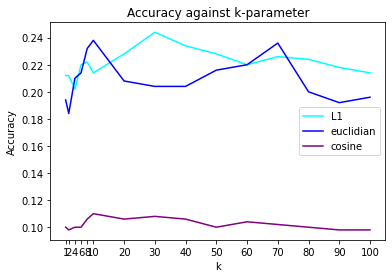

In [431]:
plt.title("Accuracy against k-parameter")
plt.plot(values_for_k, accuracies_l, color="cyan", label="L1")
plt.plot(values_for_k, accuracies_e, color="blue", label="euclidian")
plt.plot(values_for_k, accuracies_c, color="purple", label="cosine")
plt.legend()
plt.xlabel("k")
plt.xticks(values_for_k)
plt.ylabel("Accuracy")   
plt.show()

As can be seen in the plot, in general the models differ but not significantly (to be more precise, all of them aren't very accurate). 

Some more specific conclusions:
- Cosine distance seems to be nonsensical for images. Even though, in theory, distance between colours can be measured in angles, it is practically very bad.

- L1 and Euclidian (also known as L2) distances are not that much differentm however L1 seems to have overall slightly higher accuracy.

- The optimal numbers of neighbours (judging by the accuracy peaks) are ~30 for L1 and 10 for L2 (also 70 is, for some reason, almost as good).

- There is some growth in accuracy with k changing from 0 to 50-70 but then as k goes up to 100 accuracy falls. So, more is not always better.
